In [211]:
import cv2
import numpy as np
import os
import re
from skimage import data, exposure
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

def preprocess_img(img_path):
    image = cv2.imread(img_path, -1)
    # Normalize image
    min_bit = np.min(image)
    max_bit = np.max(image)
    norm_image = cv2.normalize(image, dst=None, alpha=min_bit, beta=max_bit, norm_type=cv2.NORM_MINMAX)
    image = (norm_image/16).astype('uint8')
    return image

def print_img(preprocessed_img, title="Image"):    
    fig, ax = plt.subplots(figsize=(9, 3))
    ax.set_title(title)
    ax.imshow(preprocessed_img, cmap=plt.cm.gray)
    
bf_path = "R:/Users/Rahul/Documents/494/Data/88hr timelapse/EGFP_1mm/BF/"
day_0 = "R:/Users/Rahul/Documents/494/Data/Day 0/1mm EGFP/"

sample_spheroid = "R:/Users/Rahul/Documents/494/Data/88hr timelapse/EGFP_1mm/BF/scan_Plate_R_p00_0_A02f00d4.TIF"
sample_sensor = "R:/Users/Rahul/Documents/494/Data/88hr timelapse/EGFP_1mm/Texas Red/scan_Plate_R_p00_0_A02f00d3.TIF"  

In [ ]:
sample_spheroid = "R:/Users/Rahul/Documents/494/Data/88hr timelapse/EGFP_1mm/BF/scan_Plate_R_p00_0_A02f00d4.TIF"
sample_sensor = "R:/Users/Rahul/Documents/494/Data/88hr timelapse/EGFP_1mm/Texas Red/scan_Plate_R_p00_0_A02f00d3.TIF" 

In [ ]:
sample_spheroid = "R:/Users/Rahul/Documents/494/Data/Day 0/500um Src/500mmSrc_Day0_Plate_R_p00_0_B01f00d4.TIF"
sample_sensor = "R:/Users/Rahul/Documents/494/Data/Day 0/500um Src/500mmSrc_Day0_Plate_R_p00_0_B01f00d3.TIF"

## 88hr timelapse - Src_500um - First Picture

In [ ]:
sample_spheroid = "R:/Users/Rahul/Documents/494/Data/88hr timelapse/Src_500um/BF/scan_Plate_R_p00_0_B01f00d4.TIF"
sample_sensor = "R:/Users/Rahul/Documents/494/Data/88hr timelapse/Src_500um/Texas Red/scan_Plate_R_p00_0_B01f00d3.TIF"

In [ ]:
isSensor = False

threshold = 100 if isSensor else 120

img = sample_sensor if isSensor else sample_spheroid
img = preprocess_img(img)

_, thresh = cv2.threshold(img, threshold, np.max(img), cv2.THRESH_BINARY)

In [ ]:
# Retrieval modes and contour approximation types found on OpenCV docs
raw_contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, 
                                       cv2.CHAIN_APPROX_NONE)

## Circle detection

In [ ]:
radius_range = (15, 100) if isSensor else (40, 500)

contours = []
for contour in raw_contours:
    # Most items in raw contours are lines or small shapes
    if cv2.contourArea(contour) < (np.pi * radius_range[0] ** 2):
        continue
    contours.append(contour)    

circle_coords = []
for contour in contours:
    (x, y), r = cv2.minEnclosingCircle(contour)
    if r > radius_range[1]:
        continue
    circle_coords.append((x, y, r))

In [ ]:
verbose = True

fig, ax = plt.subplots(figsize=(9, 3))

ax.set_title("MinEnclosingCircle")
ax.imshow(img, cmap=plt.cm.gray)

print("All units in um ({} pixels/um)\n".format(scale))
for idx, circle in enumerate(circle_coords):
    x, y, r = circle[0], circle[1], circle[2]
    c = plt.Circle((x, y), r, color="red", linewidth=2, fill=False)
    
    if verbose:
        ax.text(x + r, y, str(idx+1), color='red', fontsize=15)
        
        scale = 0.638
        x, y, r = x/scale, y/scale, r/scale
        print("Circle #{}:\n center (x,y): ({}, {})\n area: {}".format(idx+1,x,y,np.pi*r**2))
        
    ax.add_patch(c)
    
ax.set_axis_off()

In [194]:
path = r"C:\Users\Rahul Behal\Documents\494\Data\Z - Stack\beads+spheroids_stack (2.2um slice)\EGFP_1mm.2021-04-08-13-52-41\EGFP_1mm_Plate_R_p00_z00_0_A02f00d4.TIF"

In [163]:
path = r"C:\Users\Rahul Behal\Documents\494\Data\Z - Stack\beads+spheroids_stack (2.2um slice)\EGFP_1mm.2021-04-08-13-52-41\EGFP_1mm_Plate_R_p00_z00_0_A02f00d2.TIF"

## Z-Stack

In [203]:
def variance_of_laplacian(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()

In [220]:
folder = r"C:\Users\Rahul Behal\Documents\494\Data\Z - Stack\beads+spheroids_stack (2.2um slice)\EGFP_500um.2021-04-08-13-44-49"

In [237]:
folder = r"C:\Users\Rahul Behal\Documents\494\Data\Z - Stack\EGFP_1mm.2021-03-17-20-38-58"

In [233]:
folder = r"C:\Users\Rahul Behal\Documents\494\Data\Z - Stack\EGFP_500um.2021-03-17-20-12-05"

In [7]:
sample_spheroid = os.listdir(folder)[1]
sample_bead = os.listdir(folder)[2]

In [8]:
sample_spheroid

'EGFP_1mm_Plate_R_p00_z00_0_A02f00d2.TIF'

In [15]:
id_pattern = r"z(\d{1,4}).*d(\d)"

In [238]:
images = []
id_pattern = r"z(\d{1,4}).*d(\d)"

for file in os.listdir(folder):
    if file.upper().endswith("TIF"):
        im_path = os.path.join(folder, file)

        match = re.search(id_pattern, file)
        if not match or len(match.groups()) != 2:
            continue
        # Needs (match.groups(),) to unpack tuple properly
        for id_, type_ in (match.groups(),):
            if type_ == "4":
                images.append((id_, file, "BF", im_path))
            elif type_ == "2":
                images.append((id_, file, "TR", im_path))
            else:
                continue

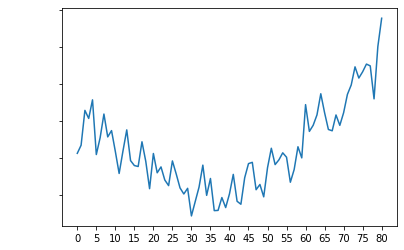

In [239]:
imageSharpness = []
for (id_, _, type_, path) in images:
    image = preprocess_img(path)
    
    if type_ == "TR":
        fm = variance_of_laplacian(image)
        imageSharpness.append((id_, fm))
    
x = []
y = []
for id_, fm in imageSharpness:
    x.append(float(id_))
    y.append(1 / fm)
    
plt.plot(x, y)
plt.xticks(np.arange(min(x), max(x)+1, 5.0))
plt.yticks(color="None")
plt.show()    

## Excel Writing

In [63]:
import xlsxwriter

In [109]:
workbook = xlsxwriter.Workbook("C:/Users/Rahul Behal/Desktop/test2.xlsx")
rawDataSheet = workbook.add_worksheet("Raw Data")
calcDataSheet = workbook.add_worksheet("Calculated Data")

h1_format = workbook.add_format({
    'bold': 1,
    'underline': 1,
    'align': 'center',
    'valign': 'vcenter',
    'fg_color': '#FFD966'})
h2_format = workbook.add_format({
    'bold': 1,
    'underline': 1,
    'align': 'center',
    'valign': 'vcenter',
    'fg_color': '#F4B084'})
h3_format = workbook.add_format({
    'bold': 1,
    'align': 'center',
    'valign': 'vcenter',
    'fg_color': '#C6E0B4'})
id_format = workbook.add_format({
    'bold': 1,
    'align': 'left',
    'fg_color': '#8EA9DB'})
data_format = workbook.add_format({'align': 'right','fg_color': '#C6E0B4'})
data_format.set_num_format('0.00')
strain_format = workbook.add_format({'align': 'right','fg_color': '#C6E0B4'})
strain_format.set_num_format('0.00000000')

In [110]:
data = {'p02': ({'1': ['365269.40712547314', '2488.244514106583', '1596.3949843260189', '340.9822039469656', '340.9822039469656', '0'], '2': ['223851.89996122388', '1380.0719449512637', '824.91797563798', '266.9349598660364', '266.9349598660364', '0']}, {'1a': ['2986.7974600324383', '2423.662430814067', '1853.3110902600902', '66.26275041634013', '57.39134905106595', 
'63.865631103515625'], '1b': ['12510.93456137555', '2479.1829937304074', '1698.1511130975705', '136.27348275020205', '116.89300297943402', '30.570865631103516'], '2a': ['908.2700111213213', '1431.3133502828664', '718.6528029486677', '36.642651572870236', '31.56008765241569', '7.639884948730469']}), 'p00': ({'1': ['411759.2528030942', '2456.5217308116185', '1589.6783428132346', '362.03182304167075', '362.03182304167075', '0'], '2': ['263809.2263241648', '1404.000691859326', '817.7392654658111', '289.7810980817741', '289.7810980817741', '0']}, {'1a': ['3426.1757408246467', '2411.6044477982955', '1866.6529162176723', '76.14037086223733', '57.293422543516726', '80.4987564086914'], '1b': ['14985.163505837763', '2475.3639914772725', '1688.5259263567789', '146.6280419998408', '130.12315038603302', '22.962120056152344'], '2a': ['1983.456782884504', '1429.697449304467', '725.7778921097423', '51.42788901971799', '49.10595514183881', '19.82471466064453']}), 'p01': ({'1': ['358753.45656505664', '2500.064096480701', '1604.2554131869613', '337.92716956063873', '337.92716956063873', '0'], '2': ['232930.15192237854', '1392.092618075284', '816.1655533650078', '272.2939039846199', '272.2939039846199', '0']}, {'1a': ['3974.5447164205184', '2420.5146239469045', '1863.6149343652037', '83.07676404994857', '60.914114351182896', '81.33804035186768'], '1b': ['14449.666105361177', '2475.0178704814853', '1694.2368271208854', '143.54736902123335', '128.16595956449598', '28.087814331054688'], '2a': ['1148.1521093521646', '1431.261020768025', '722.0631662207337', '44.396523024221196', '32.927638684694294', '27.459762573242188']})} 
baseId = 'p00'
spheroidIds = sorted(data[baseId][0].keys())
sensorIds = sorted(data[baseId][1].keys())

In [111]:
sensorCount = {}
for spheroidId in spheroidIds:
    sensorList = []
    for sensorId in sensorIds:
        if int(spheroidId) == int(sensorId[0]):
            sensorList.append(sensorId)
    sensorCount[spheroidId] = sensorList

In [112]:
headerRow = ["ID#","AREA","X","Y","MAJOR","MINOR","ADJ. ANGLE","ID#","AREA","X","Y","MAJOR","MINOR","ADJ. ANGLE"]     

In [113]:
def writeRawDayData(startRow, startCol, dayId):
    rowNum, colNum = startRow, startCol
    
    # Convert spheroid and sensor data into arrays of strings for Excel write
    spheroidRows = []
    for id_ in spheroidIds:
        rowData = data[dayId][0].get(id_,['','','','','','',''])
        spheroidRows.append([str(id_)] + rowData)
    sensorRows = []
    for id_ in sensorIds:
        rowData = data[dayId][1].get(id_,['','','','','','',''])
        sensorRows.append([str(id_)] + rowData)       
    
    # Header Rows
    rawDataSheet.merge_range(startRow, startCol, startRow, startCol + 13, "DAY{}".format(dayId.upper()), h1_format)
    rowNum = rowNum + 1
    rawDataSheet.merge_range(rowNum, startCol, rowNum, startCol + 6, "SPHEROID", h2_format)
    rawDataSheet.merge_range(rowNum, startCol + 7, rowNum, startCol + 13, "SENSOR", h2_format)
    rowNum = rowNum + 1
    for i in range(len(headerRow)):
        entry = headerRow[i]
        if i == 0 or i == 7:
            rawDataSheet.write(rowNum, colNum, entry, id_format)
        else:
            rawDataSheet.write(rowNum, colNum, entry, h3_format)
        colNum = colNum + 1
    rowNum = rowNum + 1
    colNum = startCol



    # Spheroid Rows
    data_start = rowNum, colNum

    for row in spheroidRows:
        for j in range(len(row)):
            entry = row[j]
            if j > 0:
                rawDataSheet.write_number(rowNum, colNum, float(entry), data_format)
            else:
                rawDataSheet.write_number(rowNum, colNum, float(entry), id_format)
            colNum = colNum + 1
        currRow = rowNum

        rowNum = rowNum + 1
        colNum = startCol   

        if row == spheroidRows[-1]:
            break
        while rowNum < currRow + len(sensorCount[row[0]]) + 1:
            for j in range(len(row)):
                if j > 0:
                    rawDataSheet.write(rowNum, colNum, "", data_format)
                else:
                    rawDataSheet.write(rowNum, colNum, "", id_format)
                colNum = colNum + 1     
            rowNum = rowNum + 1
            colNum = startCol



    # Sensor Rows
    rowNum, colNum = data_start
    colNum = colNum + 7

    for i in range(len(sensorRows)):
        row = sensorRows[i]
        for j in range(len(row)):
            entry = row[j]
            if j > 0:
                rawDataSheet.write_number(rowNum, colNum, float(entry), data_format)
            else:
                rawDataSheet.write(rowNum, colNum, entry, id_format)
            colNum = colNum + 1

        if i < len(sensorRows) - 1:
            currRowNum = row[0][0:2] if row[0][0:2].isdigit() else row[0][0]
            nextRowNum = sensorRows[i+1][0][0:2] if sensorRows[i+1][0][0:2].isdigit() else sensorRows[i+1][0][0]

            if int(currRowNum) != int(nextRowNum):
                rowNum = rowNum + 1  
                colNum = startCol + 7
                for j in range(len(row)):
                    if j > 0:
                        rawDataSheet.write(rowNum, colNum, "", data_format)
                    else:
                        rawDataSheet.write(rowNum, colNum, "", id_format)
                    colNum = colNum + 1     

        rowNum = rowNum + 1            
        colNum = startCol + 7

In [114]:
# Start
dayIds = sorted(data.keys())
rowNum, colNum = 0, 0
for i in range(len(dayIds)):
    id_ = dayIds[i]
    writeRawDayData(rowNum, colNum+(15*i), id_)
rawDataSheet.set_column(0, 15*len(dayIds), 10)    

0

In [115]:
headerRow = ["ID#","SPHEROID AREA STRAIN","RADIAL STRAIN","CIRCUMFERENTIAL STRAIN"]

In [116]:
def writeCalcDayData(startRow, startCol, dayId):
    rowNum, colNum = startRow, startCol
    
    # Get strain data for row
    strainRows = []
    for sensorId in sensorIds:
        # Data indices: -1: Adj. Angle, 0: Area, 3: Major, 4: Minor
        row = []

        sensorNum = sensorId[0][0:2] if sensorId[0][0:2].isdigit() else sensorId[0][0]
        day0 = dayIds[0]

        currSpheroidData = data[dayId][0].get(sensorNum, '')
        day0SpheroidData = data[day0][0].get(sensorNum, '')

        if not currSpheroidData or not day0SpheroidData:
            row = ['', '', '', '']
            strainRows.append(row)
            continue

        areaStrain = (float(currSpheroidData[0]) - float(day0SpheroidData[0])) / float(day0SpheroidData[0]) 

        currSensorData = data[dayId][1].get(sensorId, '')
        day0SensorData = data[day0][1].get(sensorId, '')

        if not currSensorData or not day0SensorData:
            row = ['', areaStrain, '', '']
            strainRows.append(row)
            continue    

        if float(currSensorData[-1]) - float(currSpheroidData[-1]) < 45:
            radialStrain = (float(currSensorData[4]) - float(day0SensorData[3])) / float(day0SensorData[3])
            circStrain = (float(currSensorData[3]) - float(day0SensorData[4])) / float(day0SensorData[4])
        else:
            radialStrain = (float(currSensorData[3]) - float(day0SensorData[4])) / float(day0SensorData[4])
            circStrain = (float(currSensorData[4]) - float(day0SensorData[3])) / float(day0SensorData[3])

        row = [sensorId, areaStrain, radialStrain, circStrain]
        strainRows.append(row)
        
    # Writing header rows
    calcDataSheet.merge_range(startRow, startCol, startRow, startCol + 3, "DAY{}".format(dayId.upper()), h1_format)
    rowNum = rowNum + 1
    for i, entry in enumerate(headerRow): 
        if i == 0:
            calcDataSheet.write(rowNum, colNum, entry, id_format)
        else:
            calcDataSheet.write(rowNum, colNum, entry, h3_format)
        colNum = colNum + 1
    colNum = startCol
    rowNum = rowNum + 1

    # Writing to calculated data spreadsheet
    for i, row in enumerate(strainRows):
        for j in range(len(row)):
            entry = row[j]
            if j > 0:
                calcDataSheet.write_number(rowNum, colNum, float(entry), strain_format)
            else:
                calcDataSheet.write(rowNum, colNum, entry, id_format)
            colNum = colNum + 1

        if i < len(strainRows) - 1:
            currRowNum = row[0][0:2] if row[0][0:2].isdigit() else row[0][0]
            nextRowNum = strainRows[i+1][0][0:2] if strainRows[i+1][0][0:2].isdigit() else strainRows[i+1][0][0]

            if int(currRowNum) != int(nextRowNum):
                rowNum = rowNum + 1  
                colNum = startCol
                for j in range(len(row)):
                    if j > 0:
                        calcDataSheet.write(rowNum, colNum, "", strain_format)
                    else:
                        calcDataSheet.write(rowNum, colNum, "", id_format)
                    colNum = colNum + 1     

        rowNum = rowNum + 1            
        colNum = startCol        

In [117]:
dayId = dayIds[1]
rowNum, colNum = 0, 0
for i, id_ in enumerate(dayIds[1:]):
    writeCalcDayData(rowNum, colNum+(5*i), id_)
calcDataSheet.set_column(0, 15*(len(dayIds)-1), 20) 

0